In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (9.5,6)

# Exercises 03.1 #

## Reference prices ##

In [3]:
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


## GBM sampling ##
Parameters used to sample the $GMB$ and estimate the European call-option and put-option average prices:

In [4]:
print(open("./ex_1/parameters.out").read())

simulations	10000
asset price	100
delivery time	1
strike price	100
risk-free rate	0.1
volatility	0.25



##  Direct sampling ##

### Call option ###

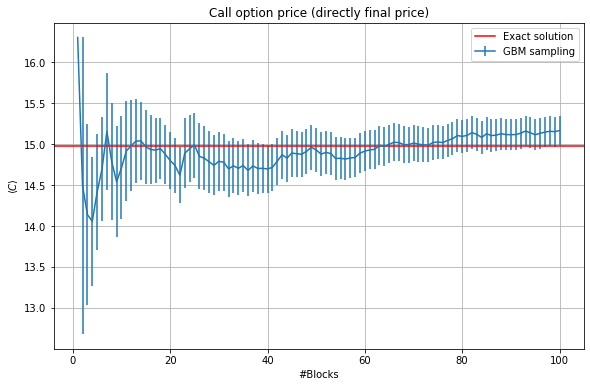

Average CALL OPTION price = 15.1647 +/- 0.180179


In [5]:
blocks, C, error = np.loadtxt("./ex_1/call.out", usecols=(0,1,2), unpack='true')
N = len(C)

plt.errorbar(blocks,C,yerr=error, label ='GBM sampling')

plt.axhline(y=call, linestyle='-', label ='Exact solution', color ='r')

plt.xlabel('#Blocks')
plt.ylabel(r'$\langle C \rangle$')
plt.grid(True)
plt.title("Call option price (directly final price)")
plt.legend()
plt.show()


print("Average CALL OPTION price =", C[N-1], "+/-", error[N-1])


### Put option ###

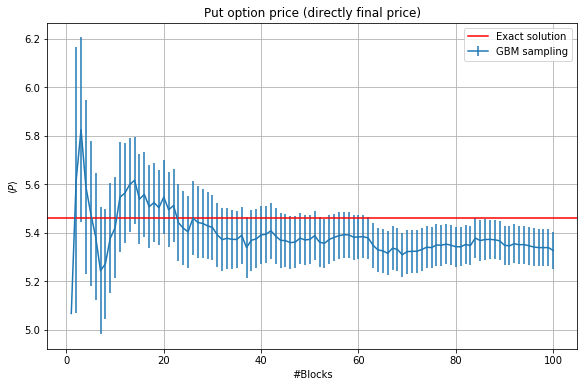

Average PUT OPTION price = 5.32614 +/- 0.0751208


In [6]:
blocks, P, error = np.loadtxt("./ex_1/put.out", usecols=(0,1,2), unpack='true')
plt.errorbar(blocks,P,yerr=error, label ='GBM sampling')
plt.axhline(y=put, linestyle='-', label ='Exact solution', color ='r')
N = len(P)
plt.xlabel('#Blocks')
plt.ylabel(r'$\langle P \rangle$')
plt.title("Put option price (directly final price)")
plt.grid(True)
plt.legend()
plt.show()

print("Average PUT OPTION price =", P[N-1], "+/-", error[N-1])

## Discretized sampling from GBM ##

### Call option ###

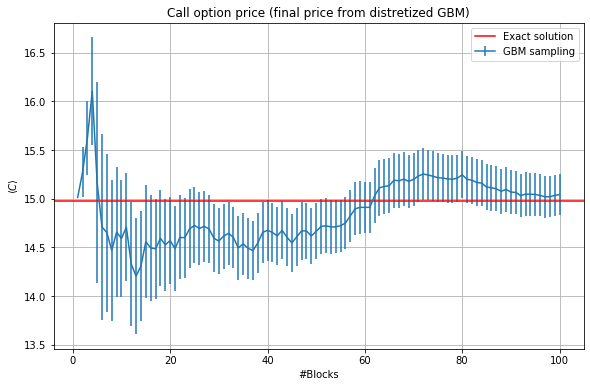

Average CALL OPTION price = 15.0429 +/- 0.208343


In [7]:
blocks, C, error = np.loadtxt("./ex_1/call_discrete.out", usecols=(0,1,2), unpack='true')
plt.errorbar(blocks,C,yerr=error, label ='GBM sampling')

plt.axhline(y=call, linestyle='-', label ='Exact solution', color='r')

N = len(C)
plt.xlabel('#Blocks')
plt.ylabel(r'$\langle C \rangle$')
plt.title("Call option price (final price from distretized GBM)")
plt.grid(True)
plt.legend()
plt.show()

print("Average CALL OPTION price =", C[N-1], "+/-", error[N-1])

### Put option ###

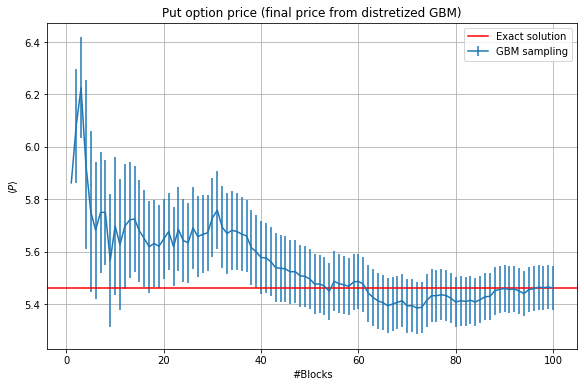

Average PUT OPTION price = 5.46138 +/- 0.0828219


In [8]:
blocks, P, error = np.loadtxt("./ex_1/put_discrete.out", usecols=(0,1,2), unpack='true')
plt.errorbar(blocks,P,yerr=error, label ='GBM sampling')
plt.axhline(y=put, linestyle='-', label ='Exact solution', color ='r')
N = len(P)
plt.xlabel('#Blocks')
plt.ylabel(r'$\langle P \rangle$')
plt.grid(True)
plt.title("Put option price (final price from distretized GBM)")
plt.legend()
plt.show()

print("Average PUT OPTION price =", P[N-1], "+/-", error[N-1])